In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
calories = pd.read_csv("calories.csv")

In [3]:
#print 1st five rows of books
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
#checking shape
calories.shape

(15000, 2)

In [5]:
#checking information
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB


In [6]:
#checking null values
calories.isnull().sum()

User_ID     0
Calories    0
dtype: int64

In [7]:
#checking duplicate values
calories.duplicated().sum()

0

In [8]:
#loading the dataset
exercise = pd.read_csv("exercise.csv")

In [9]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [10]:
exercise.shape

(15000, 8)

In [11]:
exercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB


In [12]:
exercise.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [13]:
exercise.duplicated().sum()

0

In [14]:
#combining two dataset
calories_data = pd.concat([exercise, calories["Calories"]], axis=1)

In [15]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [16]:
calories_data.shape

(15000, 9)

In [17]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [18]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [19]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


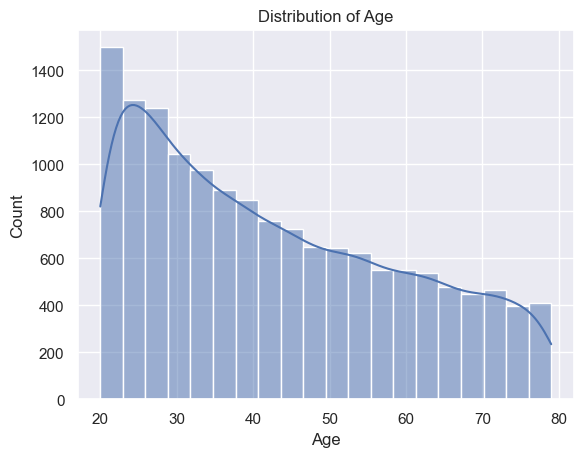

In [20]:
#distribution of Age
sns.set()
sns.histplot(calories_data["Age"], bins = 20, kde = True)
plt.title("Distribution of Age")
plt.show()

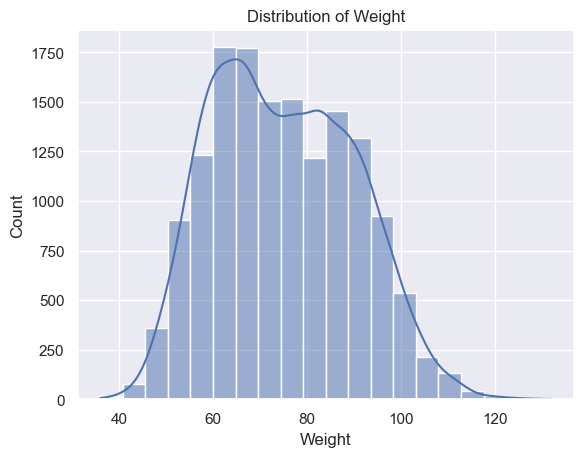

In [21]:
#distribution of Weight
sns.histplot(calories_data["Weight"], bins = 20, kde = True)
plt.title("Distribution of Weight")
plt.show()

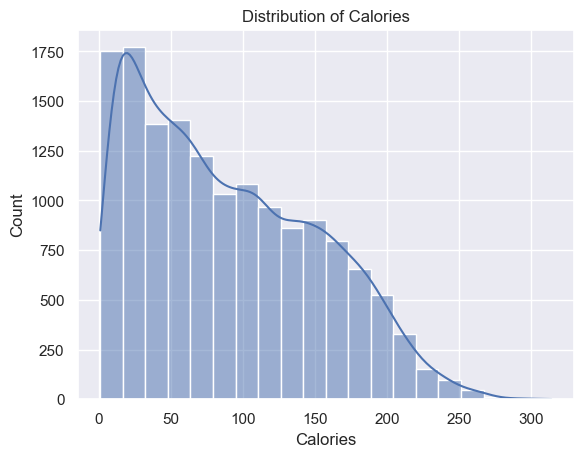

In [22]:
#distribution of Calories
sns.histplot(calories_data["Calories"], bins = 20, kde = True)
plt.title("Distribution of Calories")
plt.show()

In [23]:
#count of unique values in the gender column
calories_data["Gender"].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

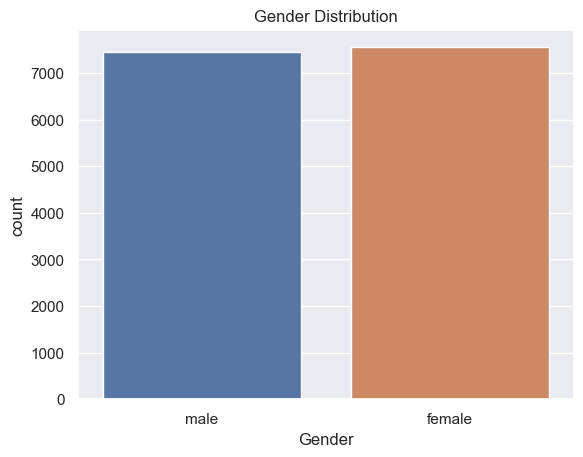

In [24]:
#gender distribution
sns.countplot(x = "Gender", data = calories_data)
plt.title("Gender Distribution")
plt.show()

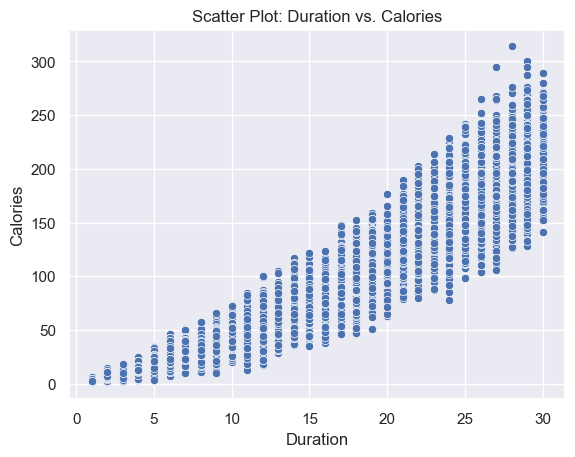

In [25]:
#scatter plot between Duration and Calories
sns.scatterplot(x = "Duration", y = "Calories", data = calories_data)
plt.title("Scatter Plot: Duration vs. Calories")
plt.show()

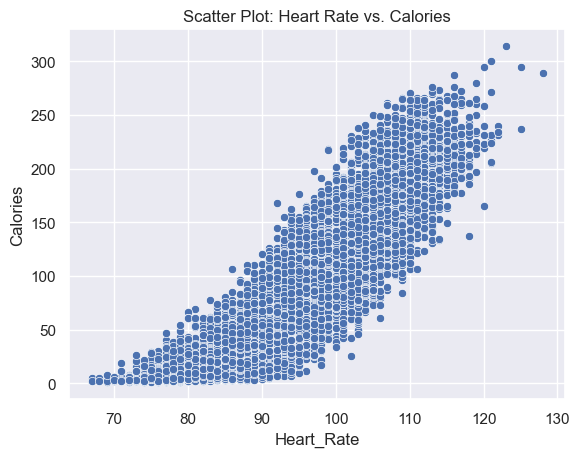

In [26]:
#scatter plot between Heart_Rate and Calories
sns.scatterplot(x = "Heart_Rate", y = "Calories", data = calories_data)
plt.title("Scatter Plot: Heart Rate vs. Calories")
plt.show()

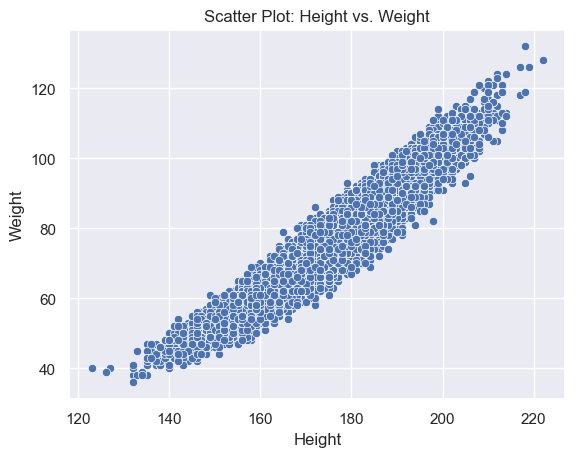

In [27]:
#scatter plot between Height and Weight
sns.scatterplot(x = calories_data["Height"], y = calories_data["Weight"])
plt.title("Scatter Plot: Height vs. Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

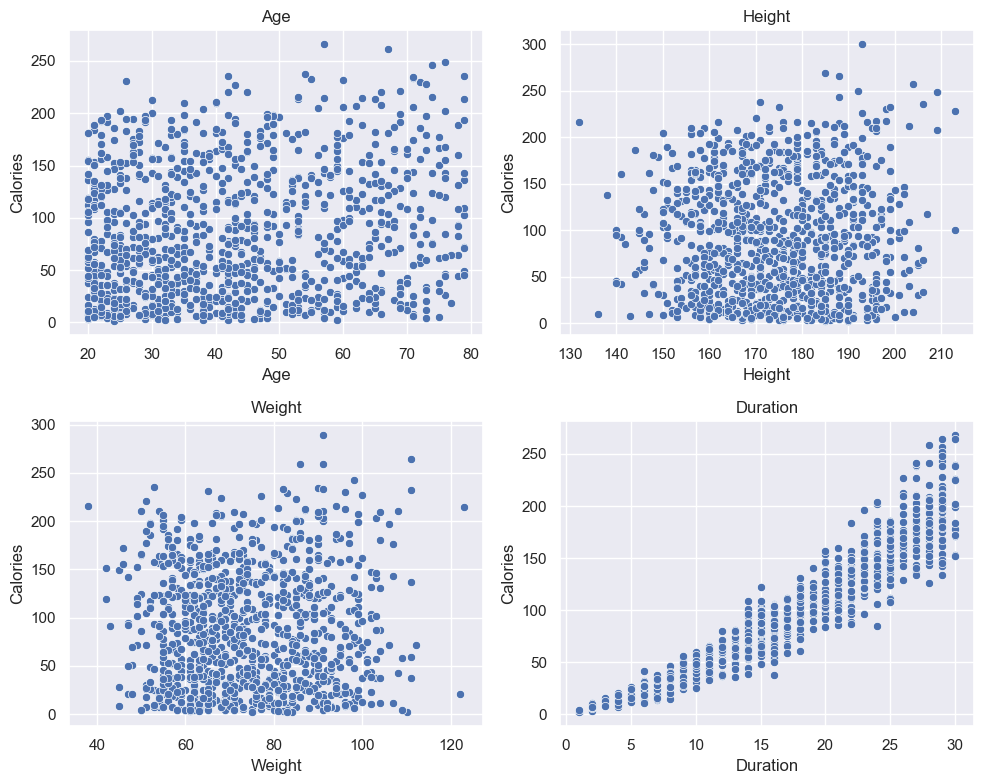

In [28]:
#define the features to be plotted
features = ["Age", "Height", "Weight", "Duration"]

#create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 8))

#loop through each feature and plot a scatter plot of 1000 random samples against Calories
for i, col in enumerate(features):
    ax = axes[i // 2, i % 2]
    x = calories_data.sample(1000)
    if isinstance(x, pd.DataFrame) or isinstance(x, pd.Series):
        sns.scatterplot(x = x[col], y = x["Calories"], ax = ax)
        ax.set_title(col)

#adjust layout and display the plots
plt.tight_layout()
plt.show()

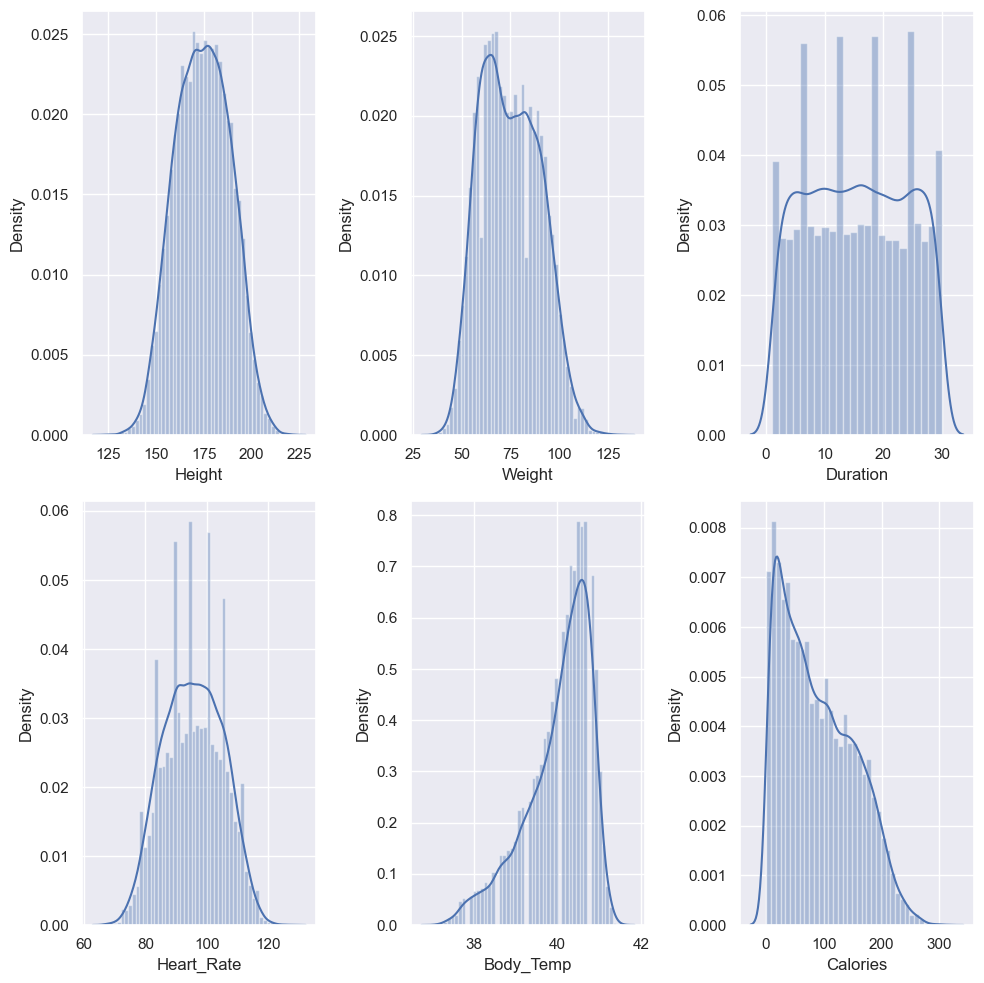

In [29]:
#extracting numerical features (float type) from the calories_data DataFrame
features = calories_data.select_dtypes(include='float').columns

#create subplots with 2 rows and 3 columns, each subplot showing the distribution of a numerical feature
plt.subplots(figsize=(10, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    
    #plotting the distribution using seaborn's distplot
    sns.distplot(calories_data[col])

#adjust layout and display the plots
plt.tight_layout()
plt.show()

In [30]:
#converting the 'Gender' column in calories_data to numerical values (0 for female, 1 for male)
calories_data.replace({"Gender":{"female": 0, "male": 1}}, inplace=True)


#calories_data["Gender"] = pd.Categorical(calories_data["Gender"])
#calories_data["Gender"] = calories_data["Gender"].cat.codes
#calories_data["Gender"] = calories_data["Gender"].replace({-1: np.nan})

In [31]:
#sns.countplot(calories_data["Gender"].value_counts())

In [32]:
#correlation matrix
correlation = calories_data.corr()

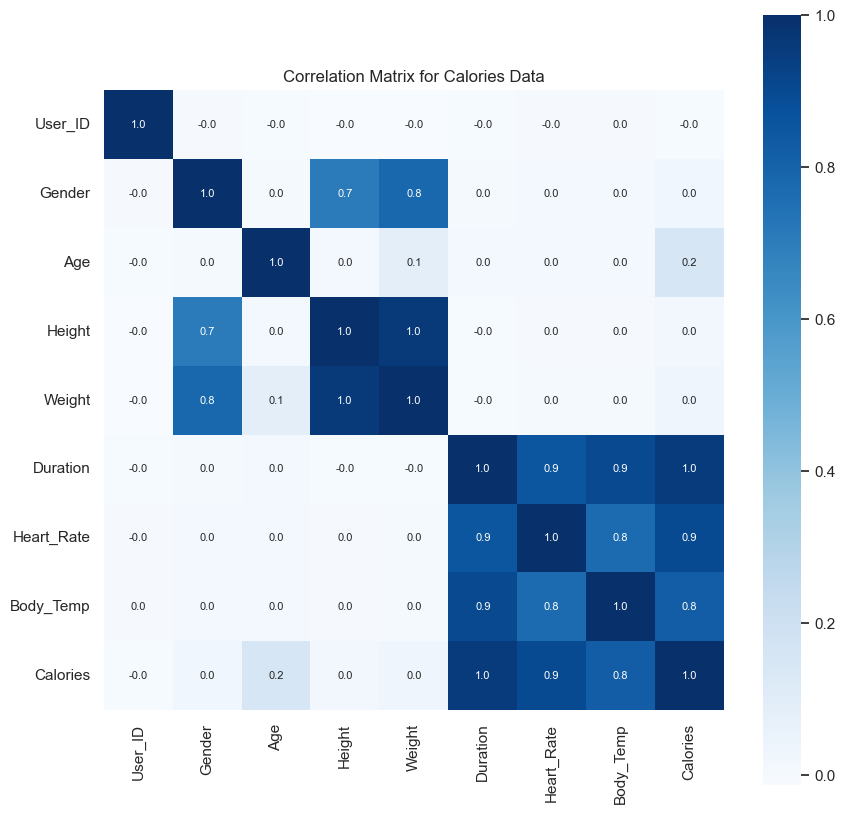

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = ".1f", annot = True, 
            annot_kws = {"size": 8}, cmap = "Blues")
plt.title("Correlation Matrix for Calories Data")
plt.show()

In [34]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [35]:
#separating features (X) and target variable (y)
X = calories_data.drop(columns=["User_ID", "Calories"], axis = 1)
y = calories_data["Calories"]

In [36]:
#displaying the features (X) DataFrame
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [37]:
#displaying the features (y) DataFrame
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [38]:
#splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [39]:
#checking shapes
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [40]:
#creating a StandardScaler object
scaler = StandardScaler()

#scaling the training features (X_train)
X_train = scaler.fit_transform(X_train)

#scaling the testing features (X_test) using the same scaler fitted on training data
X_test = scaler.transform(X_test)

In [41]:
#list of regression models to be used
models = [LinearRegression(), Lasso(), RandomForestRegressor(), Ridge()]

#loop through each model in the list
for i in range(4):
    #fit the model on the training data
    models[i].fit(X_train, y_train)
    
    #print the model name
    print(f"{models[i]} : ")
    
    #predict and calculate mean absolute error for training data
    train_pred = models[i].predict(X_train)
    print("Training Error : ", mean_absolute_error(y_train, train_pred))
    
    #predict and calculate mean absolute error for testing data
    val_pred = models[i].predict(X_test)
    print("Validation Error : ", mean_absolute_error(y_test, val_pred))
    
    #print a newline for better readability
    print()

LinearRegression() : 
Training Error :  8.332985229896737
Validation Error :  8.385188053147173

Lasso() : 
Training Error :  9.049658999072935
Validation Error :  8.989469141792506

RandomForestRegressor() : 
Training Error :  0.6800183333333334
Validation Error :  1.7035033333333331

Ridge() : 
Training Error :  8.332695704014448
Validation Error :  8.384821966003726



In [42]:
#XGBoost Regressor model
regressor_model = XGBRegressor()

In [43]:
regressor_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [44]:
#predicting on the training data using the XGBoost Regressor model
training_data_prediction = regressor_model.predict(X_train)

#calculating R squared error for the training data
score_1 = metrics.r2_score(y_train, training_data_prediction)
print("R squared error : ", score_1)

#calculating Mean Absolute Error for the training data
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)
print("Mean Absolute Error : ", score_2)

R squared error :  0.9995517443430838
Mean Absolute Error :  0.9656331550205747


In [45]:
#predicting on the test data using the XGBoost Regressor model
test_data_prediction = regressor_model.predict(X_test)

#calculating R squared error for the test data
score_1 = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", score_1)

#calculating Mean Absolute Error for the test data
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)
print("Mean Absolute Error : ", score_2)

R squared error :  0.9988453127264426
Mean Absolute Error :  1.4804779006441435


In [46]:
#input_data representing a set of features for prediction
input_data = (0, 20, 166.0, 60.0, 14.0, 94.0, 40.3)

#converting input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the array to be compatible with the model
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

#predicting using the XGBoost Regressor model
predict = regressor_model.predict(input_data_reshaped)

#printing the prediction
print(predict)

#printing the result in a readable format
print("Calories Burnt : ", predict[0])

[278.99765]
Calories Burnt :  278.99765
